# Requirements

In [64]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

## Blood Pressure Analysis


# Dataset Description

## Attributes

* id - patient identifier
* age - patient age
* height - patient height in cm
* weight - patient weight in kg
* blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - does patient have dental caries

### Target variable
* blood - patient systolic blood pressure

# Read the dataset

In [49]:
data=pd.read_csv('blood_pressure_data.csv')
data['birthdate'] = pd.to_datetime(data['age'], format='%m/%d/%Y', errors='coerce')

# Reference date to calculate age (e.g., Jan 1, 2025)
reference_date = pd.to_datetime('2025-01-01')

# Calculate age in years
data['age'] = ((reference_date - data['birthdate']).dt.days // 365)

# Now handle missing age values by filling with median age
median_age = data['age'].median()
data['age'].fillna(median_age, inplace=True)

D:\Users\Windows\AppData\Local\Temp\ipykernel_9468\1496311635.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(median_age, inplace=True)


Explore the dataset using visualizations of your choice.

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height(cm)'}>,
        <Axes: title={'center': 'weight(kg)'}>],
       [<Axes: title={'center': 'relaxation'}>,
        <Axes: title={'center': 'blood sugar'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'HDL'}>],
       [<Axes: title={'center': 'LDL'}>,
        <Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'Urine protein'}>,
        <Axes: title={'center': 'serum creatinine'}>],
       [<Axes: title={'center': 'AST'}>, <Axes: title={'center': 'ALT'}>,
        <Axes: title={'center': 'Gtp'}>,
        <Axes: title={'center': 'blood pressure'}>],
       [<Axes: title={'center': 'birthdate'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

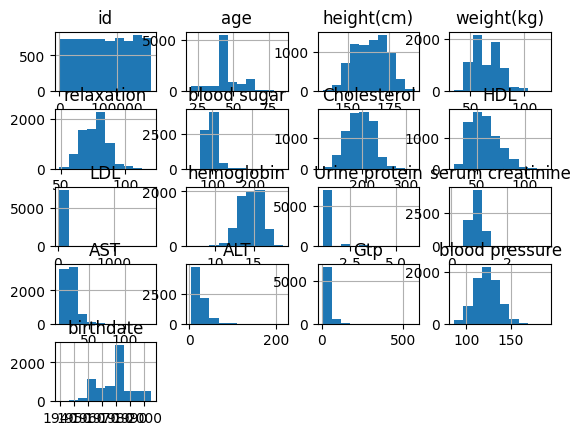

In [50]:
data.hist()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [51]:
(data.isnull().sum()/len(data)*100).reset_index().rename(columns={'index':'feature',0:'%'})

,feature,%
0,id,26.72
1,age,0.00
2,height(cm),26.27
3,weight(kg),25.56
4,relaxation,25.75
5,blood sugar,25.62
6,Cholesterol,26.14
7,triglyceride,13.56
8,HDL,26.09
9,LDL,26.42


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

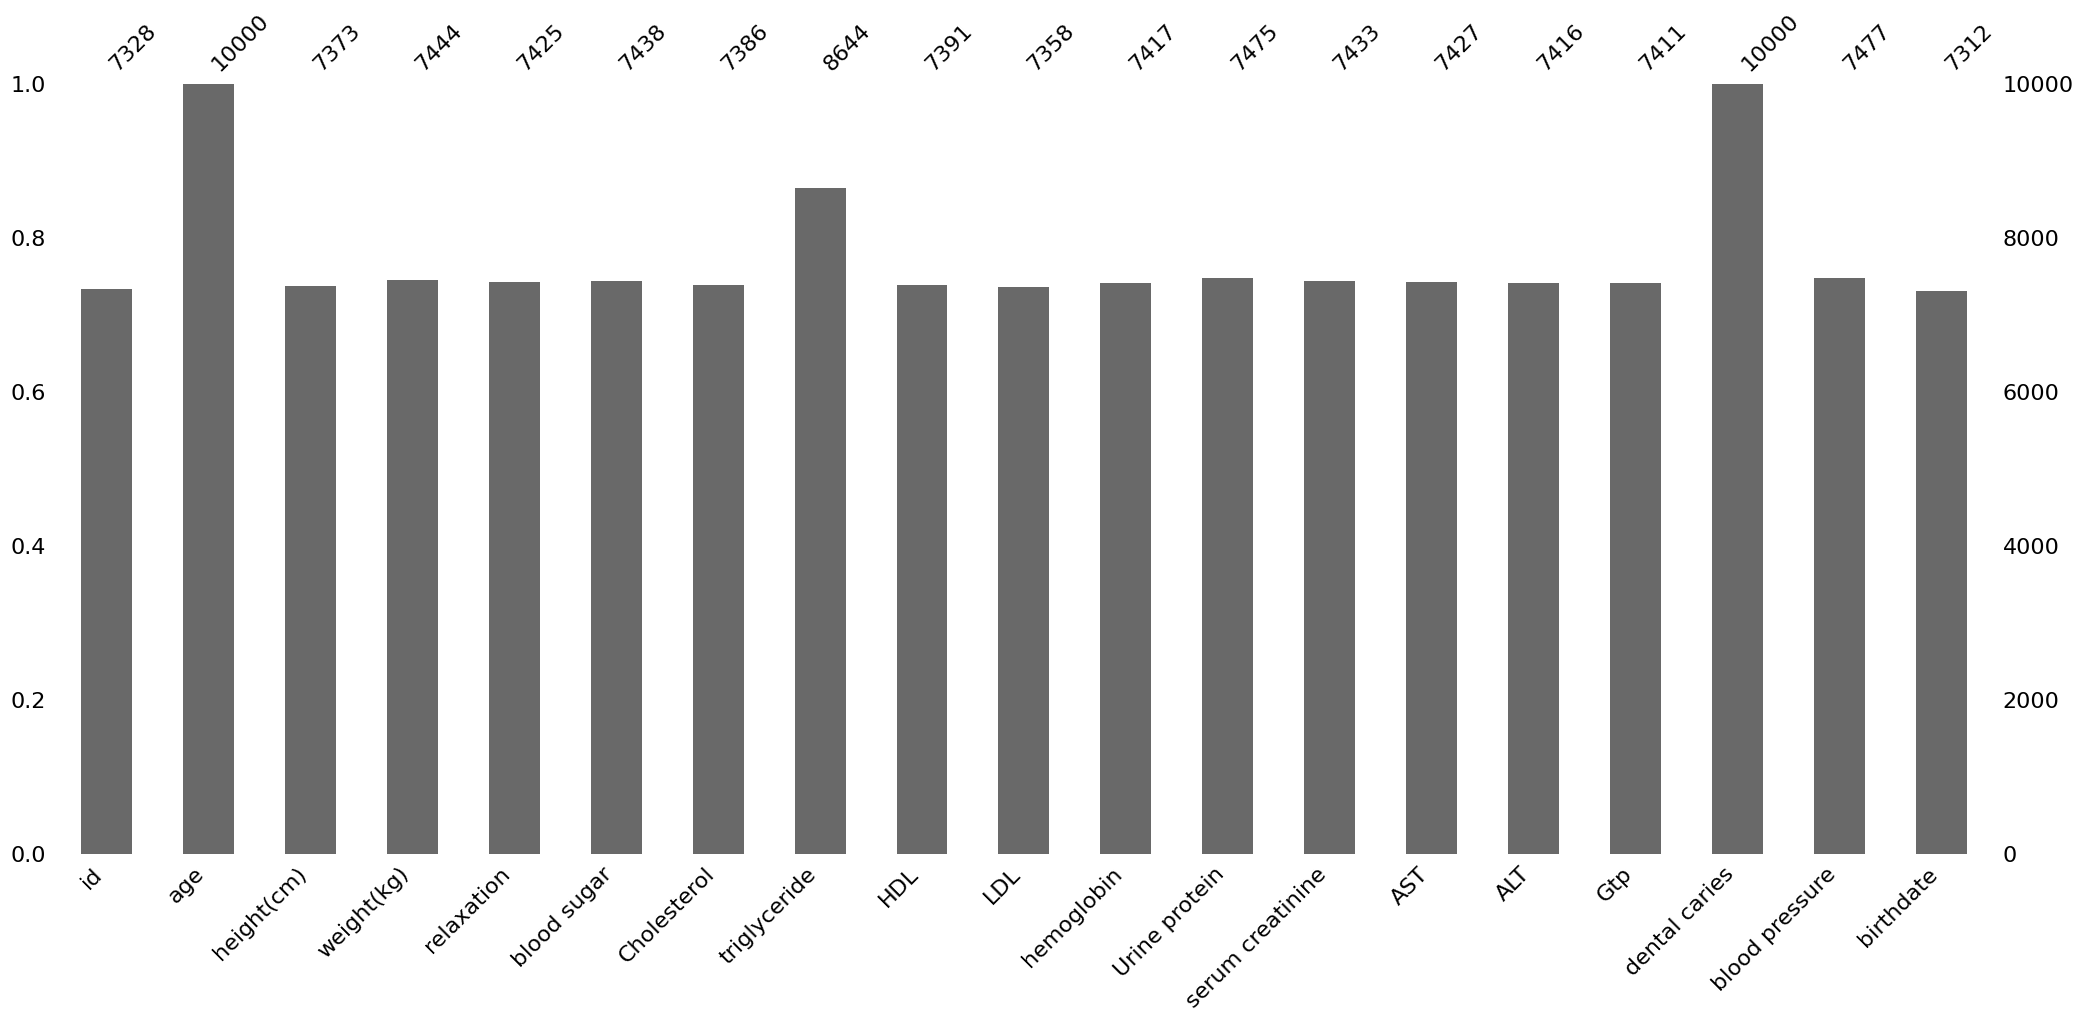

In [52]:
msno.bar(data)

<Axes: >

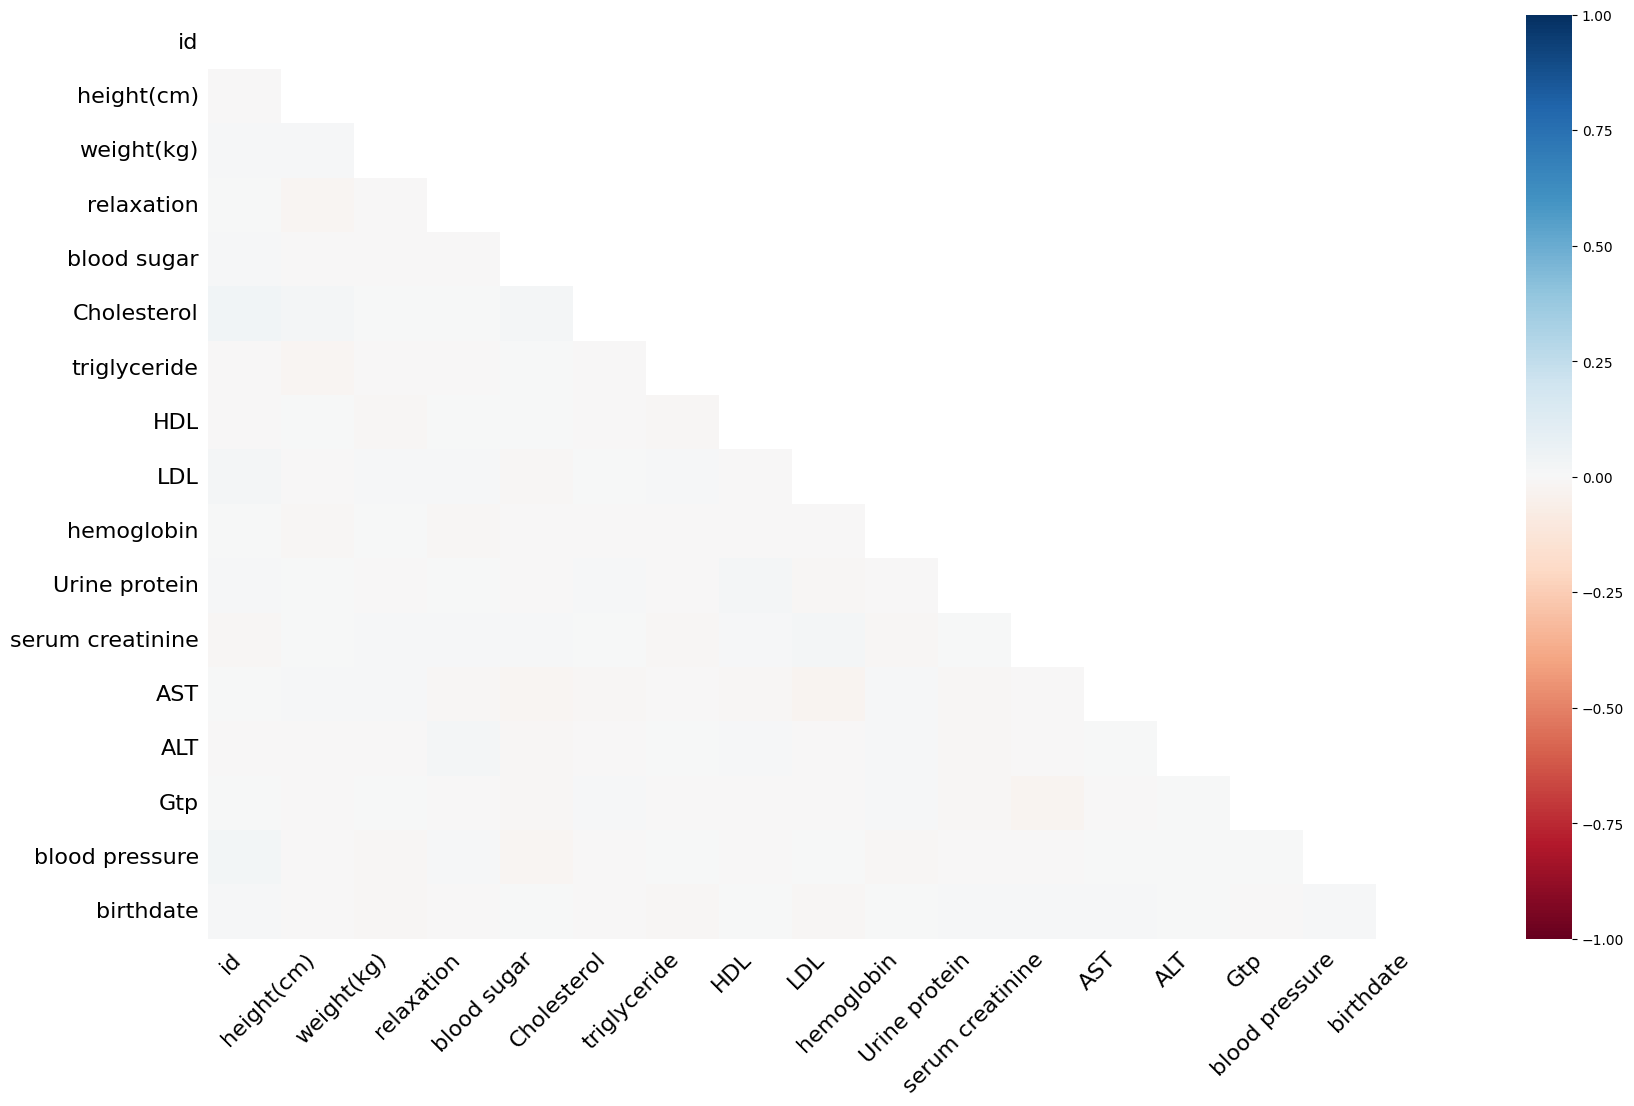

In [53]:
msno.heatmap(data)

<Axes: >

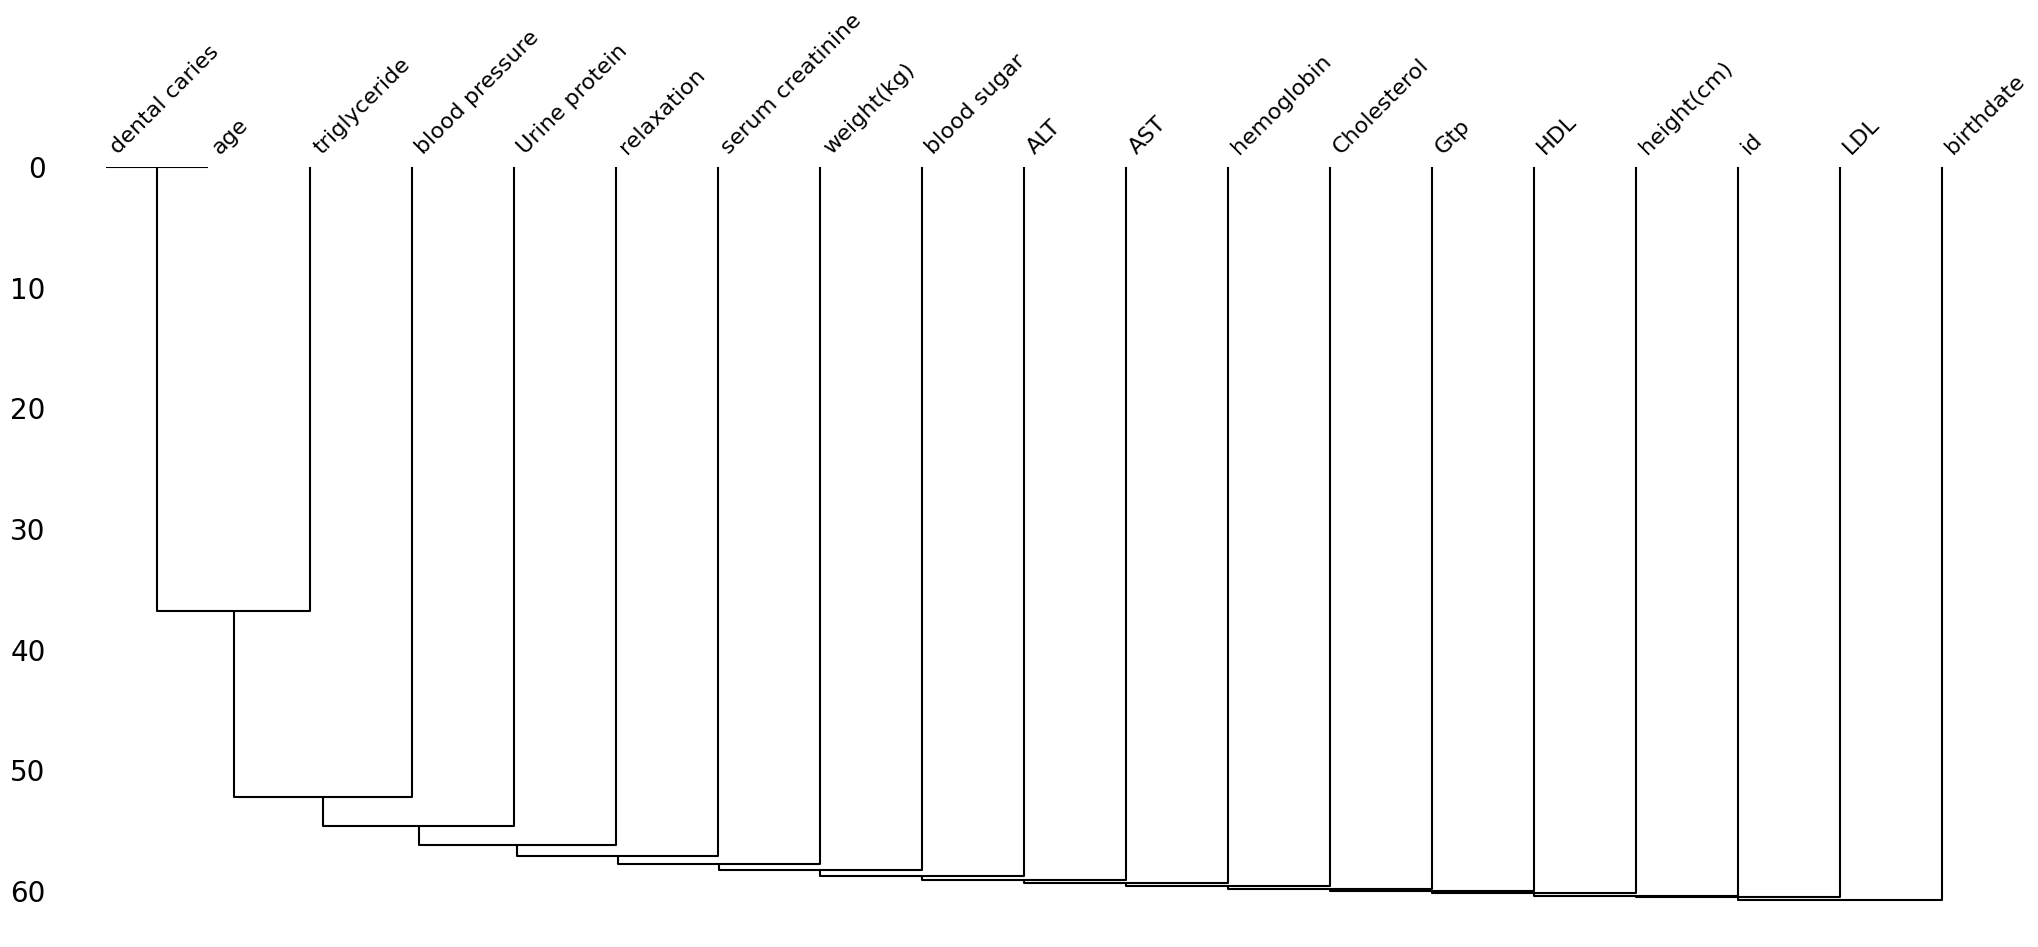

In [54]:
msno.dendrogram(data)

<Axes: >

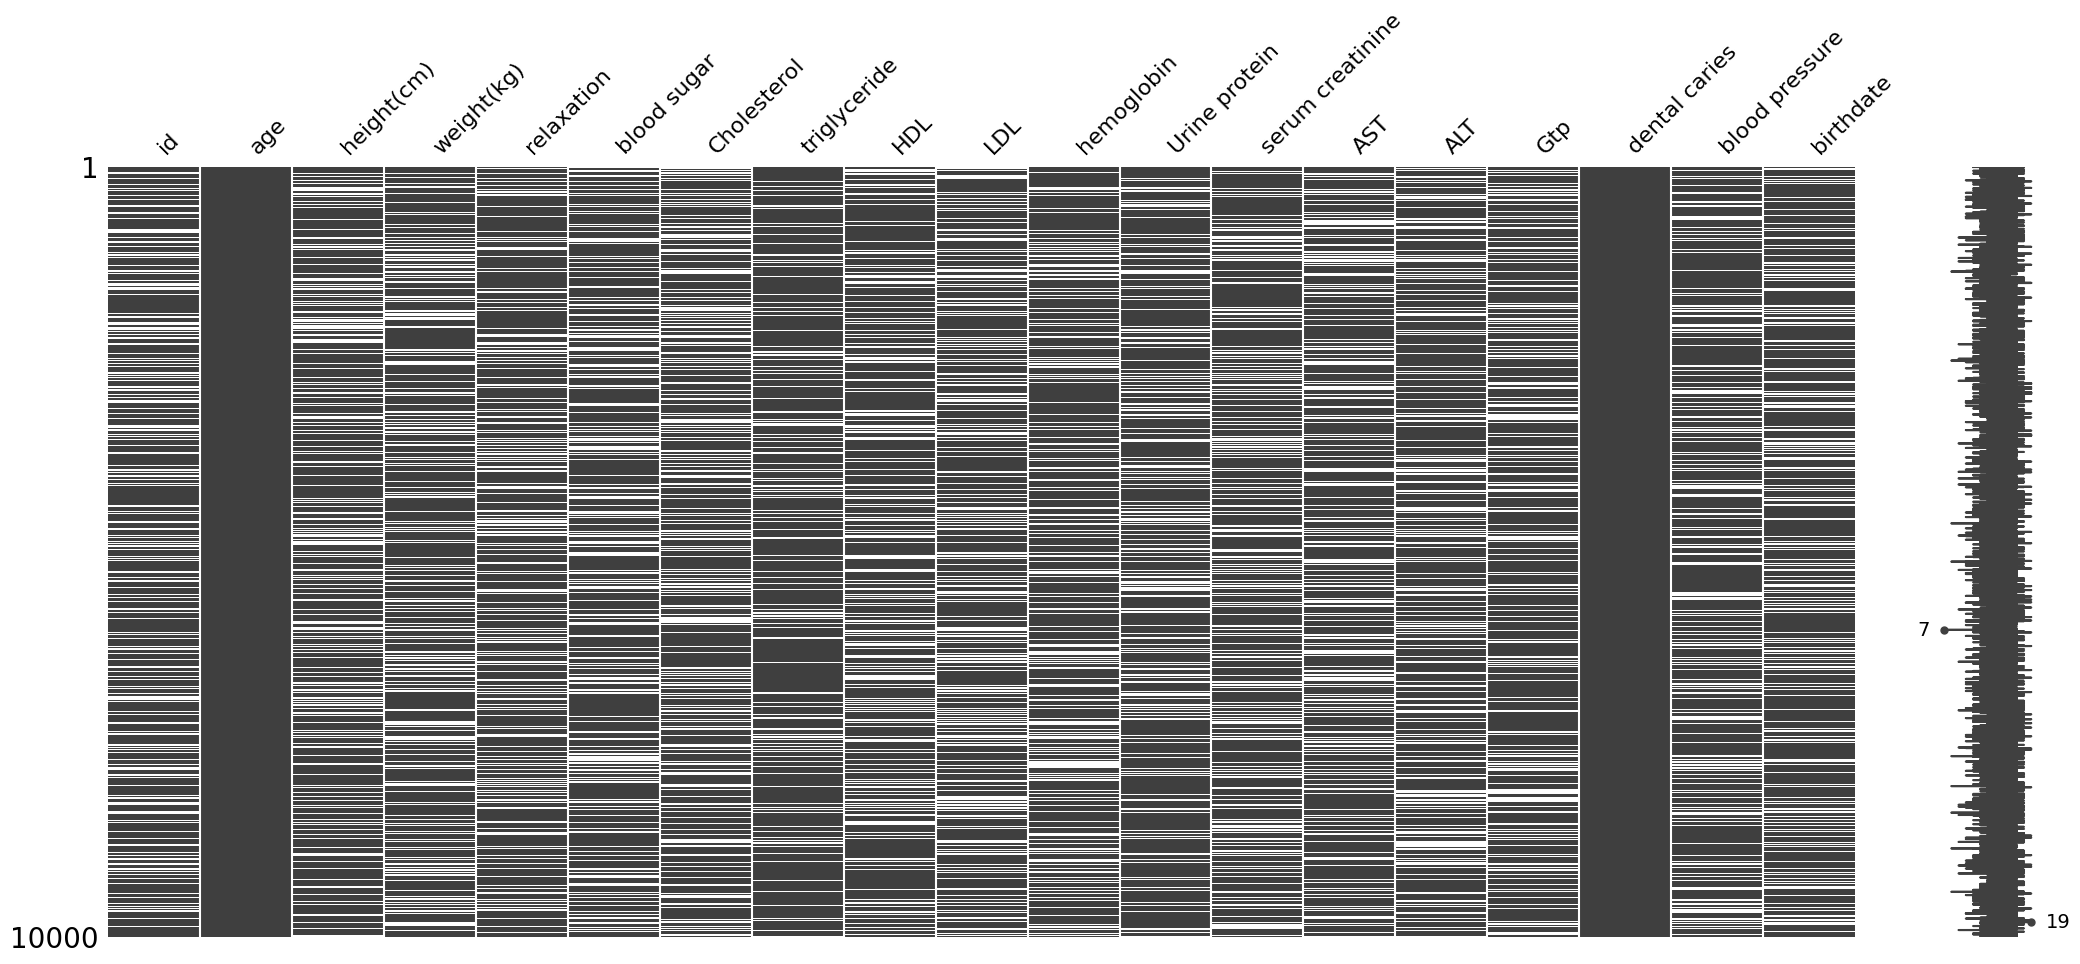

In [55]:
msno.matrix(data)

In [56]:
data.sample(3)

,id,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure,birthdate
9213,116622.0,25.0,NaN,50.0,68.0,97.0,160.0,NORMAL,68.0,68.0,12.0,3.0,NaN,24.0,31.0,37.0,No,122.0,1999-01-27
4802,122084.0,40.0,180.0,NaN,86.0,103.0,182.0,LOW,65.0,102.0,13.3,1.0,0.9,27.0,35.0,NaN,No,NaN,1984-05-06
6336,77284.0,30.0,NaN,85.0,81.0,88.0,227.0,LOW,62.0,NaN,15.4,1.0,1.2,21.0,29.0,26.0,No,NaN,1994-08-05


## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [57]:
data = drop_data(data=data, columns=['id'])
data = simple_impute_data(data=data, columns=['height(cm)','Urine protein','birthdate', 'weight(kg)','blood sugar','relaxation', 'Cholesterol', 'HDL', 'LDL','hemoglobin','serum creatinine','AST','ALT','Gtp','blood pressure'], strategy='mean')
data = label_data(data=data, columns=['triglyceride', 'dental caries'])
data.isnull().sum()

age                 0
height(cm)          0
weight(kg)          0
relaxation          0
blood sugar         0
Cholesterol         0
triglyceride        0
HDL                 0
LDL                 0
hemoglobin          0
Urine protein       0
serum creatinine    0
AST                 0
ALT                 0
Gtp                 0
dental caries       0
blood pressure      0
birthdate           0
dtype: int64

In [58]:
def drop_data(data:pd.DataFrame, columns:list):
  data_copy = data.copy()
  data_copy.drop(columns, axis=1, inplace=True)
  return data_copy
     

def simple_impute_data(data:pd.DataFrame, columns:list, strategy:str):
  imputer = SimpleImputer(strategy=strategy)
  data_copy = data.copy()

  for column in columns:
    data_copy[column] = imputer.fit_transform(data_copy[[column]])
  return data_copy
     

def label_data(data:pd.DataFrame, columns:list):
  encoder = LabelEncoder()
  data_copy = data.copy()

  for column in columns:
    data_copy[column] = encoder.fit_transform(data_copy[[column]].astype(str).values.ravel())

    # if 'nan' in encoder.classes_:
    #   data_copy.loc[data_copy[column] == -1, column] = np.nan
  return data_copy
     

# def knn_impute_data(data:pd.DataFrame, columns:list, n_neighbors:int, weights:str):
#   imputer = KNNImputer(n_neighbors=n_neighbors, weights=weights)
#   data_copy = data.copy()

#   for column in columns:
#     data_copy[column] = imputer.fit_transform(data_copy[column].to_numpy().reshape(-1, 1))
#   return data_copy


## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [ ]:
# Write your code here. Add as many boxes as you need.

## Model comparison with cross-validation

Train two models: XGBoost and RandomForest for predicting the target variable. Use 5-fold cross-validation to evaluate the performance of the models and compare them using adrquate metrics.

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data, target_data, test_size=0.2)

In [78]:
rf=RandomForestRegressor(random_state=42)
xgb=XGBRegressor(random_state=42)

In [79]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data, target_data, test_size=0.2)
rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [81]:
xgb_pred=xgb.predict(X_test)
rf_pred=rf.predict(X_test)

# Cross-Validation

In [82]:
cv = KFold(n_splits=5)


In [83]:
xgb_cross_val=cross_validate(xgb, input_data, target_data, cv=cv, scoring=scoring)
rf_cross_val=cross_validate(xgb, input_data, target_data, cv=cv, scoring=scoring)

Assess the performance of the models by using different metrics provided by the `scikit-learn` library.

In [89]:
print('Random Forest')
print("mae:", mean_absolute_error(Y_test, rf_pred))
print("mse:", np.sqrt(mean_squared_error(Y_test, rf_pred)))
print("r2:", r2_score(Y_test, rf_pred))
print('XGB ')
print("mae:", mean_absolute_error(Y_test, xgb_pred))
print("mse:", np.sqrt(mean_squared_error(Y_test, xgb_pred)))
print("r2:", r2_score(Y_test, xgb_pred))

Random Forest
mae: 7.261687492309748
mse: 9.302037274400105
r2: 0.3147958017624537
XGB 
mae: 4.724721683528728
mse: 6.4955962188848435
r2: 0.6658804367903259


In [97]:
result= {
    "METRIC": ['MAE','MSE','R2'],
  "RandomForest": ['7.261687492309748','9.302037274400105','0.3147958017624537'],
  "XGB": ['4.724721683528728',
'6.4955962188848435',
'0.6658804367903259']
}

#load data into a DataFrame object:
df = pd.DataFrame(result)

df 

,METRIC,RandomForest,XGB
0,MAE,7.261687492309748,4.724721683528728
1,MSE,9.302037274400105,6.4955962188848435
2,R2,0.3147958017624537,0.6658804367903259
